## Sesión 2
#### Funciones Lamda, Pandas

<p>En esta sesión exploraremos las funcionalidades básicas de Pandas, una librería que permite manejar datos en forma de DataFrames.</p>

* Construir un DataFrame a partir de estructuras de Python
    + Listas (Series)
    + Diccionarios (DataFrames)
    + Python pickle
* Construir un DataFrame a partir de un archivo (Extract)
    + Leer (csv, xls, JSON, SQL)
    + Escribir (csv)
    + Leer remoto (web, APIs)
* Explorar DataFrames
    + Head, Tail, Columns, Describe, Dtypes
    + Plot, histogram
* Acceso (indexación) DataFrames
    + Referenciar columnas: como atributo (punto) y como elemento (corchete)
    + Filtrar registros mediante condiciones lógicas
    + Ignore_index
* Manipulación de DataFrames
    + Concatenate, append
    + Merge, join

### Funciones 
+ Def
+ Lambda

In [151]:
def doblar_y_dividir_por_dos(x):
    def doblar():
        return 2 * x

    def dividir_por_dos():
        return x / 2

    return [doblar(), dividir_por_dos()]

In [152]:
doblar_y_dividir_por_dos(10)

[20, 5.0]

## Funciones anónimas (lambda)

Inspirado en los lenguajes funcionales, Python también permite definir funciones anónimas, las cuales corresponden a funciones que se pueden asignar a variables o pueden ser empleadas en los argumentos de otras funciones que requieran una función por parámetro. Estas funciones se crean empleando la palabra clave lambda, como es posible apreciar a continuación:

In [153]:
f = lambda x, y: x + y

In [154]:
f(2, 3)

5

En el contexto de otras funciones, es posible recordar la función sorted, introducida en el módulo de listas. Esta función además de ordenar elementos sencillos, también puede ordenar listas que contienen elementos más complejos (por ejemplo diccionarios) empleando un criterio específico tal como el valor de una llave específica a través del argumento key. Este argumento espera una función que tiene como parámetro un elemento de la lista, y retorna el valor por el cual debe ordenarse el elemento en la lista:

In [159]:
lista_desordenada = [{'nombre': 'enlatado', 'precio': 1000},
                     {'name': 'jamón', 'precio': 2000},
                     {'nombre': 'huevos', 'precio': 200}]

In [160]:
lista_desordenada

[{'nombre': 'enlatado', 'precio': 1000},
 {'name': 'jamón', 'precio': 2000},
 {'nombre': 'huevos', 'precio': 200}]

In [161]:
lista_ordenada_por_precio = sorted(lista_desordenada, key=lambda x: x['precio'])

In [162]:
lista_ordenada_por_precio

[{'nombre': 'huevos', 'precio': 200},
 {'nombre': 'enlatado', 'precio': 1000},
 {'name': 'jamón', 'precio': 2000}]

**Nota:** Las funciones anónimas solo pueden ser empleadas para realizar operaciones básicas, así como invocación de funciones. Sin embargo, no es posible realizar flujos de control más complejos (e.g. ciclos `for`, `while`, etc).

In [163]:
converter = lambda x : x*2 if x < 10 else (x*3 if x < 20 else x)

In [164]:
print('convert 5 to : ', converter(5))
print('convert 13 to : ', converter(13))
print('convert 23 to : ', converter(23))

convert 5 to :  10
convert 13 to :  39
convert 23 to :  23


In [165]:
def make_incrementor(n):
    return lambda x: x + n

f = make_incrementor(42)

In [166]:
f(0)

42

In [167]:
f(2)

44

### 1. Construir un DataFrame a partir de estructuras de Python

* Listas (Series)
* Diccionarios (DataFrames)
* Python pickle

In [1]:
import pandas as pd

In [2]:
# crear una serie a partir de una lista
print("\nMi serie:\n")
datos = [2,5,4,6,7,8,1]
serie = pd.Series(datos, name="CafesDia")
print(serie)


Mi serie:

0    2
1    5
2    4
3    6
4    7
5    8
6    1
Name: CafesDia, dtype: int64


In [94]:
print(serie.index)
print(serie.values)

RangeIndex(start=0, stop=7, step=1)
[2 5 4 6 7 8 1]


In [97]:
serie1 = pd.Series(datos, index=['a','b','c','d','e','f','g'], name="CafesDia")
serie1

a    2
b    5
c    4
d    6
e    7
f    8
g    1
Name: CafesDia, dtype: int64

In [99]:
print(serie1.index)
print(serie1.values)

Index(['a', 'b', 'c', 'd', 'e', 'f', 'g'], dtype='object')
[2 5 4 6 7 8 1]


In [100]:
serie1['c']

4

In [108]:
print('std',serie.std())
print('mean',serie.mean())
print('quantile',serie.quantile(.1))
print(serie.describe())
print(serie**2)
print(np.log(serie))

std 2.563479777846623
mean 4.714285714285714
quantile 1.6
count    7.000000
mean     4.714286
std      2.563480
min      1.000000
25%      3.000000
50%      5.000000
75%      6.500000
max      8.000000
Name: CafesDia, dtype: float64
0     4
1    25
2    16
3    36
4    49
5    64
6     1
Name: CafesDia, dtype: int64
0    0.693147
1    1.609438
2    1.386294
3    1.791759
4    1.945910
5    2.079442
6    0.000000
Name: CafesDia, dtype: float64


In [110]:
#Sampling
s = pd.Series([10, 1, 8, 3, 45, 5])
s

0    10
1     1
2     8
3     3
4    45
5     5
dtype: int64

In [111]:
s.sample(n=3)

3     3
0    10
4    45
dtype: int64

In [112]:
s.sample(frac=0.5)

2     8
4    45
0    10
dtype: int64

In [117]:
s.sample(frac=1, replace=True)

5     5
3     3
1     1
1     1
0    10
4    45
dtype: int64

In [114]:
s.isin([2, 3, 6])

0    False
1    False
2    False
3     True
4    False
5    False
dtype: bool

#### DataFrame

In [3]:
# crear un dataframe a partir de un diccionario
print("\nMi dataframe:\n")
GastosDia = {"Desayuno":[3,4,3,5,4,3],
               "Almuerzo":[3,4,3,5,4,3],
               "Comida":[3,4,3,5,4,3] }
df = pd.DataFrame(GastosDia)
print(df)


Mi dataframe:

   Desayuno  Almuerzo  Comida
0         3         3       3
1         4         4       4
2         3         3       3
3         5         5       5
4         4         4       4
5         3         3       3


In [4]:
# guardar objetos de Python en un archivo (eficiente)
import pickle

In [5]:
with open("MiDict.pkl",'wb') as f:
    pickle.dump(GastosDia, f)

# borrar primer diccionario
del GastosDia

try:
    print(GastosDia)
except:
    print("\nERROR: No se pudo leer 'GastosDia'")


ERROR: No se pudo leer 'GastosDia'


In [10]:
# leer un archivo que retorna un objeto de Python (diccionario)
with open("MiDict.pkl",'rb') as f:
    NuevoDict = pickle.load(f)
print("\nDiccionario leído de archivo:\n")
print(NuevoDict)    
df=pd.DataFrame(NuevoDict)
print("\nDataFrame construido con .pkl\n")
print(df)   


Diccionario leído de archivo:

{'Desayuno': [3, 4, 3, 5, 4, 3], 'Almuerzo': [3, 4, 3, 5, 4, 3], 'Comida': [3, 4, 3, 5, 4, 3]}

DataFrame construido con .pkl

   Desayuno  Almuerzo  Comida
0         3         3       3
1         4         4       4
2         3         3       3
3         5         5       5
4         4         4       4
5         3         3       3


### 2. Construir un DataFrame a partir de un archivo (EXTRACT)

* Leer (csv, xls, JSON, SQL) / Escribir
    + set_index, columns
    + drop, axes
* Leer remoto (web, APIs)

In [26]:
path = "C:/Users/hjaime/Desktop/Notebooks/"

In [27]:
df_clima = pd.read_json(path+"clima_primer_semestre.json")
df_pib = pd.read_html(path+"pib_primer_semestre.html")
df_desempleo = pd.read_excel(path+"desempleo_primer_semestre.xls")

In [28]:
print(df_clima)
print(df_pib)
print(df_desempleo)

   Armenia  Manizales  Pereira
0       22         13       20
1       23         14       22
2       21         17       24
3       24         15       20
4       24         14       21
5       24         13       21
[   Unnamed: 0  Armenia  Manizales  Pereira
0           0       47         50       59
1           1       46         54       58
2           2       45         56       59
3           3       44         52       58
4           4       45         54       58
5           5       44         53       59]
   Unnamed: 0  Armenia  Manizales  Pereira
0           0       11          9        9
1           1       12          7        9
2           2       13          6       10
3           3       13          8        9
4           4       11          9       10
5           5       14          9        9


In [29]:
df_pib = df_pib[0]

In [30]:
# Este modifica el df_pib
df_pib.drop(["Unnamed: 0"], axis=1, inplace=True)
df_desempleo.drop(["Unnamed: 0"], axis=1, inplace=True)

In [33]:
# Este no modifica df_pib sino la copia
#df_pib_COPIA = df_pib.drop( ["Unnamed: 0"], axis=1)

print(df_clima)
print("\n")

print(df_pib)
print("\n")

print(df_desempleo)
print("\n")

   Armenia  Manizales  Pereira
0       22         13       20
1       23         14       22
2       21         17       24
3       24         15       20
4       24         14       21
5       24         13       21


   Armenia  Manizales  Pereira
0       47         50       59
1       46         54       58
2       45         56       59
3       44         52       58
4       45         54       58
5       44         53       59


   Armenia  Manizales  Pereira
0       11          9        9
1       12          7        9
2       13          6       10
3       13          8        9
4       11          9       10
5       14          9        9




In [34]:
#Crea diccionario con los nombres
cambio_nom = {"Armenia":"Armenia_Des", 
              "Pereira":"Pereira_Des", 
              "Manizales":"Manizales_Des"}
#Hace el cambio de nombres en el dataframe
df_desempleo.rename(columns=cambio_nom, inplace=True)
df_desempleo

,Armenia_Des,Manizales_Des,Pereira_Des
0,11,9,9
1,12,7,9
2,13,6,10
3,13,8,9
4,11,9,10
5,14,9,9


In [35]:
#Junta 2 dataframe
aux = df_pib.join(df_clima, lsuffix = "_PIB", rsuffix = "_Clima")
aux

,Armenia_PIB,Manizales_PIB,Pereira_PIB,Armenia_Clima,Manizales_Clima,Pereira_Clima
0,47,50,59,22,13,20
1,46,54,58,23,14,22
2,45,56,59,21,17,24
3,44,52,58,24,15,20
4,45,54,58,24,14,21
5,44,53,59,24,13,21


In [36]:
todos = aux.join(df_desempleo)
# como no hay conflictos, no usa el sufijo (qué pasa si no se cambia manualmente?)

todos.to_csv(path+"agregado_clima_pib_desempleo.csv")

todos

,Armenia_PIB,Manizales_PIB,Pereira_PIB,Armenia_Clima,Manizales_Clima,Pereira_Clima,Armenia_Des,Manizales_Des,Pereira_Des
0,47,50,59,22,13,20,11,9,9
1,46,54,58,23,14,22,12,7,9
2,45,56,59,21,17,24,13,6,10
3,44,52,58,24,15,20,13,8,9
4,45,54,58,24,14,21,11,9,10
5,44,53,59,24,13,21,14,9,9


In [38]:
import matplotlib.pyplot as plt

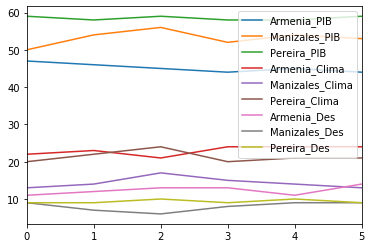

In [40]:
todos.plot()
plt.show()

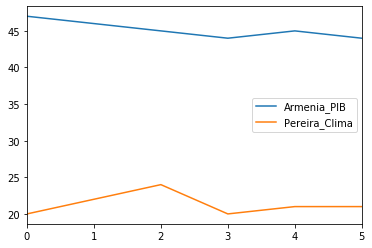

In [41]:
todos[["Armenia_PIB","Pereira_Clima"]].plot()
plt.show()

#### 3. Explorar DataFrames

* Head, Tail, Columns, Describe, Dtypes
* Plot, histogram

In [42]:
print("\nAcadémico\n")
academico = pd.read_excel("info_acad.xls")
print(academico.head())
print("\n")
print(academico.describe())


Académico

      Codigo  Promedio Disciplinario
0  201023001         3            Si
1  201023002         2            Sí
2  201023003         5            No
3  201023004         2            NO
4  201023005         5            no


             Codigo   Promedio
count  1.500000e+01  15.000000
mean   2.010230e+08   3.333333
std    4.472136e+00   1.112697
min    2.010230e+08   2.000000
25%    2.010230e+08   2.500000
50%    2.010230e+08   3.000000
75%    2.010230e+08   4.000000
max    2.010230e+08   5.000000


In [43]:
print("\nPersonal\n")
personal = pd.read_excel("info_personal.xls")
print(personal.tail())
print("\n")
print(personal.columns)


Personal

       Codigo EPS      Contacto  Edad
10  201023011   d  3.449208e+09   NaN
11  201023012   b  3.843418e+09  17.0
12  201023013   c           NaN  17.0
13  201023014   d  3.972053e+09  16.0
14  201023015   c  3.871165e+09  18.0


Index(['Codigo', 'EPS', 'Contacto', 'Edad'], dtype='object')


### Uniones
merged_left = pd.merge(left=df1,right=df2, how='left', left_on=id_df_1, right_on=id_df_2)
+ how='left' = Left Join
+ how='right' = Right Join
+ how='outer' = Full Union (fills with NaN
+ sin how = inner Join

In [45]:
print("\n\nBase completa\n")
base = academico.merge(personal, on="Codigo") #Inner Join, si las columnas se llaman igual
base_1=academico.merge(personal, left_on='Codigo', right_on='Codigo') #Digo sobre que columna hacer el merge
print(base)
print("\n")
print(base_1)
print("\n")
print(base.dtypes)



Base completa

       Codigo  Promedio Disciplinario EPS      Contacto  Edad
0   201023001         3            Si   a  3.583953e+09  19.0
1   201023002         2            Sí   b  3.708088e+09  16.0
2   201023003         5            No   c  3.457768e+09  17.0
3   201023004         2            NO   d           NaN  19.0
4   201023005         5            no   c           NaN   NaN
5   201023006         4            si   b  3.008795e+09  19.0
6   201023007         2            no   a           NaN   NaN
7   201023008         3            no   d           NaN  16.0
8   201023009         3            no   c  3.915886e+09  19.0
9   201023010         2            no   a  3.328002e+09  20.0
10  201023011         5            no   d  3.449208e+09   NaN
11  201023012         3            No   b  3.843418e+09  17.0
12  201023013         4            SI   c           NaN  17.0
13  201023014         4            si   d  3.972053e+09  16.0
14  201023015         3           NaN   c  3.871165e+

In [46]:
#Reemplaza datos
base["Disciplinario"].replace(to_replace=["Sí","Si","si","sí"], value='SI',inplace=True)
base["Disciplinario"].replace(to_replace=["No","no"], value='NO',inplace=True)
base

,Codigo,Promedio,Disciplinario,EPS,Contacto,Edad
0,201023001,3,SI,a,3.583953e+09,19.0
1,201023002,2,SI,b,3.708088e+09,16.0
2,201023003,5,NO,c,3.457768e+09,17.0
3,201023004,2,NO,d,NaN,19.0
4,201023005,5,NO,c,NaN,NaN
5,201023006,4,SI,b,3.008795e+09,19.0
6,201023007,2,NO,a,NaN,NaN
7,201023008,3,NO,d,NaN,16.0
8,201023009,3,NO,c,3.915886e+09,19.0
9,201023010,2,NO,a,3.328002e+09,20.0


In [47]:
base.set_index("Codigo",inplace=True) #Indice va a ser el codigo del estudiante (en teoría unico)
base.dropna(how="any",inplace=True) #Borra las filas con datos faltantes 'any' si hay alguna var con NA. ‘all' todas Var son NA.
base

,Promedio,Disciplinario,EPS,Contacto,Edad
Codigo,,,,,
201023001,3,SI,a,3.583953e+09,19.0
201023002,2,SI,b,3.708088e+09,16.0
201023003,5,NO,c,3.457768e+09,17.0
201023006,4,SI,b,3.008795e+09,19.0
201023009,3,NO,c,3.915886e+09,19.0
201023010,2,NO,a,3.328002e+09,20.0
201023012,3,NO,b,3.843418e+09,17.0
201023014,4,SI,d,3.972053e+09,16.0


In [48]:
base["Contacto"] = base["Contacto"].astype("str",copy=False)
base["Edad"] = base["Edad"].astype("int",copy=False)
base

,Promedio,Disciplinario,EPS,Contacto,Edad
Codigo,,,,,
201023001,3,SI,a,3583952864.0,19
201023002,2,SI,b,3708088272.0,16
201023003,5,NO,c,3457768259.0,17
201023006,4,SI,b,3008794927.0,19
201023009,3,NO,c,3915885880.0,19
201023010,2,NO,a,3328001953.0,20
201023012,3,NO,b,3843417852.0,17
201023014,4,SI,d,3972052877.0,16


In [49]:
base["Contacto"] = base["Contacto"].apply(lambda x: x[:-2])
base

,Promedio,Disciplinario,EPS,Contacto,Edad
Codigo,,,,,
201023001,3,SI,a,3583952864,19
201023002,2,SI,b,3708088272,16
201023003,5,NO,c,3457768259,17
201023006,4,SI,b,3008794927,19
201023009,3,NO,c,3915885880,19
201023010,2,NO,a,3328001953,20
201023012,3,NO,b,3843417852,17
201023014,4,SI,d,3972052877,16


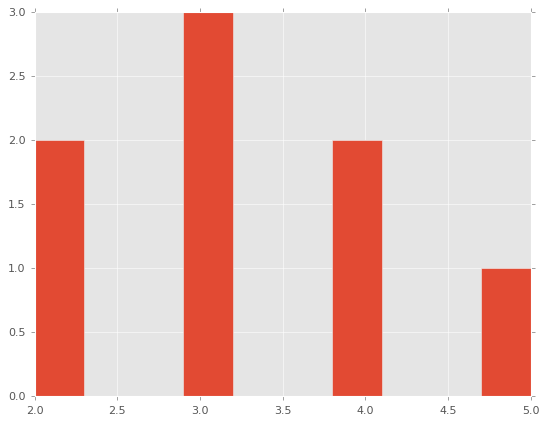

In [52]:
import matplotlib.pyplot as plt
#plt.style.use('classic')
plt.style.use('ggplot')

base["Promedio"].hist()
plt.show()

#### 4. Acceso (indexación) DataFrames

* Referenciar columnas: como atributo (punto) y como elemento (corchete)
* Filtrar registros mediante condiciones lógicas
* Ignore_index

In [53]:
print(base.Promedio)
print("\n")
print(base["Promedio"])

Codigo
201023001    3
201023002    2
201023003    5
201023006    4
201023009    3
201023010    2
201023012    3
201023014    4
Name: Promedio, dtype: int64


Codigo
201023001    3
201023002    2
201023003    5
201023006    4
201023009    3
201023010    2
201023012    3
201023014    4
Name: Promedio, dtype: int64


In [54]:
# seleccionar filas pre-establecidas
print("\nPromedios 1 al 6\n")
print(base["Promedio"][0:6])


Promedios 1 al 6

Codigo
201023001    3
201023002    2
201023003    5
201023006    4
201023009    3
201023010    2
Name: Promedio, dtype: int64


In [55]:
# seleccionar filas con criterio lógico
print("\n\nPromedio mayor a 3\n")
print(base["Promedio"][base["Promedio"]>=3])



Promedio mayor a 3

Codigo
201023001    3
201023003    5
201023006    4
201023009    3
201023012    3
201023014    4
Name: Promedio, dtype: int64


In [56]:
# seleccionar un pedazo de la base con criterio lógico
print("\n\nPromedio mayor a tres (toda la base)\n")
print(base[base["Promedio"]>=3])



Promedio mayor a tres (toda la base)

           Promedio Disciplinario EPS    Contacto  Edad
Codigo                                                 
201023001         3            SI   a  3583952864    19
201023003         5            NO   c  3457768259    17
201023006         4            SI   b  3008794927    19
201023009         3            NO   c  3915885880    19
201023012         3            NO   b  3843417852    17
201023014         4            SI   d  3972052877    16


In [57]:
# seleccionar un pedazo de una columna con criterio lógico de otra
print("\n\nMostrar Edad de los de promedio mayor a 3")
print(base["Edad"][base["Promedio"]>=3])



Mostrar Edad de los de promedio mayor a 3
Codigo
201023001    19
201023003    17
201023006    19
201023009    19
201023012    17
201023014    16
Name: Edad, dtype: int32


In [58]:
# seleccionar un pedazo de una base con criterio lógico combinado
print("\n\nSubconjunto de la base de aprobados sin procesos disciplinarios\n")
gente_chevere = base[(base["Promedio"]>=3) & (base["Disciplinario"]!="SI") ]
print(gente_chevere)



Subconjunto de la base de aprobados sin procesos disciplinarios

           Promedio Disciplinario EPS    Contacto  Edad
Codigo                                                 
201023003         5            NO   c  3457768259    17
201023009         3            NO   c  3915885880    19
201023012         3            NO   b  3843417852    17


In [120]:
gente_chevere.query('(Promedio >=3) & (Edad<20)')

,Promedio,Disciplinario,EPS,Contacto,Edad
Codigo,,,,,
201023003,5,NO,c,3457768259,17
201023009,3,NO,c,3915885880,19
201023012,3,NO,b,3843417852,17


In [59]:
print("\n\nMínimo, Promedio, Máximo de edad de aprobados sin procesos disciplinarios\n")
print(gente_chevere["Edad"].min())
print(gente_chevere["Edad"].mean())
print(gente_chevere["Edad"].max())



Mínimo, Promedio, Máximo de edad de aprobados sin procesos disciplinarios

17
17.666666666666668
19


In [91]:
gente_chevere[['Edad','Promedio']].head()

,Edad,Promedio
Codigo,,
201023003,17,5
201023009,19,3
201023012,17,3


#### 5. Manipulación de DataFrames (TRANSFORM)

* Append, concatenate
* Merge, join

In [63]:
df1 = pd.DataFrame( {"A":["a1","a2","a3"],
                    "B":["b1","b2","b3"],
                    "C":["c1","c2","c3"]} )
df1

,A,B,C
0,a1,b1,c1
1,a2,b2,c2
2,a3,b3,c3


In [64]:
df2 = pd.DataFrame( {"A":["a4","a5","a6"],
                    "B":["b4","b5","b6"],
                    "C":["c4","c5","c6"]} )
df2

,A,B,C
0,a4,b4,c4
1,a5,b5,c5
2,a6,b6,c6


In [66]:
a=df1.append(df2)
b=df1.append(df2, ignore_index=True)
# Concat tambien hace esto
print(a)
print(b)

    A   B   C
0  a1  b1  c1
1  a2  b2  c2
2  a3  b3  c3
0  a4  b4  c4
1  a5  b5  c5
2  a6  b6  c6
    A   B   C
0  a1  b1  c1
1  a2  b2  c2
2  a3  b3  c3
3  a4  b4  c4
4  a5  b5  c5
5  a6  b6  c6


In [67]:
pd.concat([df1,df2])

,A,B,C
0,a1,b1,c1
1,a2,b2,c2
2,a3,b3,c3
0,a4,b4,c4
1,a5,b5,c5
2,a6,b6,c6


In [68]:
df3 = pd.DataFrame( {"D":["d1","d2","d3"],
                    "E":["e1","e2","e3"]} )
df3

,D,E
0,d1,e1
1,d2,e2
2,d3,e3


In [74]:
# Concatenate
pd.concat([df1,df3], axis=1, ignore_index=True)

,0,1,2,3,4
0,a1,b1,c1,d1,e1
1,a2,b2,c2,d2,e2
2,a3,b3,c3,d3,e3


In [76]:
import pandas as pd
import numpy as np

left = pd.DataFrame({"mail":["abc@mail.com","def@mail.com",np.nan],
                    "nombre":["A","D","G"]} )
left

,mail,nombre
0,abc@mail.com,A
1,def@mail.com,D
2,NaN,G


In [77]:
right = pd.DataFrame({"direccion":["Calle d",np.nan, "Calle j"],
                     "nombre":["D","G","J"]} )
right

,direccion,nombre
0,Calle d,D
1,NaN,G
2,Calle j,J


In [85]:
#Outer usa la unión de las claves de los dos dataframe
union = pd.merge(left, right, on="nombre", how="outer")
# ensayar en el campo "how" las opciones "left", "right", "inner", "outer"
union

,mail,nombre,direccion
0,abc@mail.com,A,NaN
1,def@mail.com,D,Calle d
2,NaN,G,NaN
3,NaN,J,Calle j


In [79]:
#Left usa las claves del dataframe izquierdo
union = pd.merge(left, right, on="nombre", how="left")
union

,mail,nombre,direccion
0,abc@mail.com,A,NaN
1,def@mail.com,D,Calle d
2,NaN,G,NaN


In [80]:
#Right usa las claves del dataframe derecho
union = pd.merge(left, right, on="nombre", how="right")
union

,mail,nombre,direccion
0,def@mail.com,D,Calle d
1,NaN,G,NaN
2,NaN,J,Calle j


In [81]:
#Inner usa la intersección de las claves de los dos dataframe
union = pd.merge(left, right, on="nombre", how="inner")
union

,mail,nombre,direccion
0,def@mail.com,D,Calle d
1,NaN,G,NaN


In [84]:
union_id = union.set_index("nombre", inplace=False)
union_id

,mail,direccion
nombre,,
A,abc@mail.com,NaN
D,def@mail.com,Calle d
G,NaN,NaN
J,NaN,Calle j


In [86]:
union_id.dropna(how="all")

,mail,direccion
nombre,,
A,abc@mail.com,NaN
D,def@mail.com,Calle d
J,NaN,Calle j


In [87]:
interseccion = pd.merge(left, right, on="nombre", how="inner")
# ensayar en el campo "how" las opciones "left", "right", "inner", "outer"
interseccion

,mail,nombre,direccion
0,def@mail.com,D,Calle d
1,NaN,G,NaN


In [178]:
#Retrieve a row by position
union_id.iloc[1]

mail         def@mail.com
direccion         Calle d
Name: D, dtype: object

In [177]:
#Retrieve a row by key
union_id.loc["A"]

mail         abc@mail.com
direccion             NaN
Name: A, dtype: object

In [88]:
interseccion.dropna(inplace=True)
interseccion

,mail,nombre,direccion
0,def@mail.com,D,Calle d


### Otro Ejemplo

In [168]:

data_1 = {'state' : ['VA', 'VA', 'VA', 'MD', 'MD'],
          'year' : [2012, 2013, 2014, 2014, 2015],
          'pop' : [5.0, 5.1, 5.2, 4.0, 4.1]}
df_1 = pd.DataFrame(data_1)
df_1

,state,year,pop
0,VA,2012,5.0
1,VA,2013,5.1
2,VA,2014,5.2
3,MD,2014,4.0
4,MD,2015,4.1


In [169]:
df_2 = pd.DataFrame(data_1, columns=['year', 'state', 'pop'])
df_2

,year,state,pop
0,2012,VA,5.0
1,2013,VA,5.1
2,2014,VA,5.2
3,2014,MD,4.0
4,2015,MD,4.1


In [170]:
df_3 = pd.DataFrame(data_1, columns=['year', 'state', 'pop', 'unempl'])
df_3

,year,state,pop,unempl
0,2012,VA,5.0,NaN
1,2013,VA,5.1,NaN
2,2014,VA,5.2,NaN
3,2014,MD,4.0,NaN
4,2015,MD,4.1,NaN


In [179]:
df_3['unempl'] = np.arange(5)
df_3

,year,state,pop,unempl
0,2012,VA,5.0,0
1,2013,VA,5.1,1
2,2014,VA,5.2,2
3,2014,MD,4.0,3
4,2015,MD,4.1,4


In [180]:
unempl = pd.Series([6.0, 6.0, 6.1], index=[2, 3, 4])
df_3['unempl'] = unempl
df_3

,year,state,pop,unempl
0,2012,VA,5.0,NaN
1,2013,VA,5.1,NaN
2,2014,VA,5.2,6.0
3,2014,MD,4.0,6.0
4,2015,MD,4.1,6.1


In [181]:
df_3['state_dup'] = df_3['state']
df_3

,year,state,pop,unempl,state_dup
0,2012,VA,5.0,NaN,VA
1,2013,VA,5.1,NaN,VA
2,2014,VA,5.2,6.0,VA
3,2014,MD,4.0,6.0,MD
4,2015,MD,4.1,6.1,MD


In [182]:
del df_3['state_dup']
df_3

,year,state,pop,unempl
0,2012,VA,5.0,NaN
1,2013,VA,5.1,NaN
2,2014,VA,5.2,6.0
3,2014,MD,4.0,6.0
4,2015,MD,4.1,6.1


In [183]:
df_3.T

,0,1,2,3,4
year,2012,2013,2014,2014,2015
state,VA,VA,VA,MD,MD
pop,5,5.1,5.2,4,4.1
unempl,NaN,NaN,6,6,6.1


### Pivot

In [184]:
df_3

,year,state,pop,unempl
0,2012,VA,5.0,NaN
1,2013,VA,5.1,NaN
2,2014,VA,5.2,6.0
3,2014,MD,4.0,6.0
4,2015,MD,4.1,6.1


In [185]:
pd.pivot_table(df_3, index='state', aggfunc=np.mean)

,pop,unempl,year
state,,,
MD,4.05,6.05,2014.5
VA,5.10,6.00,2013.0


In [186]:
pd.pivot_table(df_3, index='year', aggfunc=np.mean)

,pop,unempl
year,,
2012,5.0,NaN
2013,5.1,NaN
2014,4.6,6.0
2015,4.1,6.1


In [223]:
url = 'https://github.com/vanejaime/Curso_Python_CD/raw/master/datasets/titanic.csv.zip'
data = pd.read_csv(url)

In [224]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [225]:
pd.pivot_table(data, index=['Pclass','Sex']) #Por defecto calcula la media

Age        Fare     Parch  PassengerId     SibSp  \
Pclass Sex                                                              
1      female  34.611765  106.125798  0.457447   469.212766  0.553191   
       male    41.281386   67.226127  0.278689   455.729508  0.311475   
2      female  28.722973   21.970121  0.605263   443.105263  0.486842   
       male    30.740707   19.741782  0.222222   447.962963  0.342593   
3      female  21.750000   16.118810  0.798611   399.729167  0.895833   
       male    26.507589   12.661633  0.224784   455.515850  0.498559   

               Survived  
Pclass Sex               
1      female  0.968085  
       male    0.368852  
2      female  0.921053  
       male    0.157407  
3      female  0.500000  
       male    0.135447

In [226]:
pd.pivot_table(data, index=['Pclass','Sex'],values=["Fare"])

Fare
Pclass Sex               
1      female  106.125798
       male     67.226127
2      female   21.970121
       male     19.741782
3      female   16.118810
       male     12.661633

In [227]:
pd.pivot_table(data, index=['Pclass','Sex'],aggfunc=np.sum)

Age       Fare  Parch  PassengerId  SibSp  Survived
Pclass Sex                                                            
1      female  2942.00  9975.8250     43        44106     52        91
       male    4169.42  8201.5875     34        55599     38        45
2      female  2125.50  1669.7292     46        33676     37        70
       male    3043.33  2132.1125     24        48380     37        17
3      female  2218.50  2321.1086    115        57561    129        72
       male    6706.42  4393.5865     78       158064    173        47

In [210]:
pd.pivot_table(data,index=["Pclass","Sex"],values=["Fare"],aggfunc=[np.mean,len,np.sum])

mean    len        sum
                     Fare   Fare       Fare
Pclass Sex                                 
1      female  106.125798   94.0  9975.8250
       male     67.226127  122.0  8201.5875
2      female   21.970121   76.0  1669.7292
       male     19.741782  108.0  2132.1125
3      female   16.118810  144.0  2321.1086
       male     12.661633  347.0  4393.5865

In [228]:
pd.pivot_table(data,index=["Pclass","Sex"],values=["Fare"],columns=["Embarked"],aggfunc=[np.mean,np.sum])

mean                              sum            \
                     Fare                             Fare             
Embarked                C          Q          S          C         Q   
Pclass Sex                                                             
1      female  115.640309  90.000000  99.026910  4972.5333   90.0000   
       male     93.536707  90.000000  52.949947  3928.5417   90.0000   
2      female   25.268457  12.350000  21.912687   176.8792   24.7000   
       male     25.421250  12.350000  19.232474   254.2125   12.3500   
3      female   14.694926  10.307833  18.670077   337.9833  340.1585   
       male      9.352237  11.924251  13.307149   402.1462  465.0458   

                          
                          
Embarked               S  
Pclass Sex                
1      female  4753.2917  
       male    4183.0458  
2      female  1468.1500  
       male    1865.5500  
3      female  1642.9668  
       male    3526.3945